<a href="https://colab.research.google.com/github/amurkhon/MachineLearning-projects/blob/main/SLR_project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

In [2]:
df = pd.read_csv("https://github.com/anvarnarz/praktikum_datasets/raw/main/reklama_sales.csv")
df.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [3]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


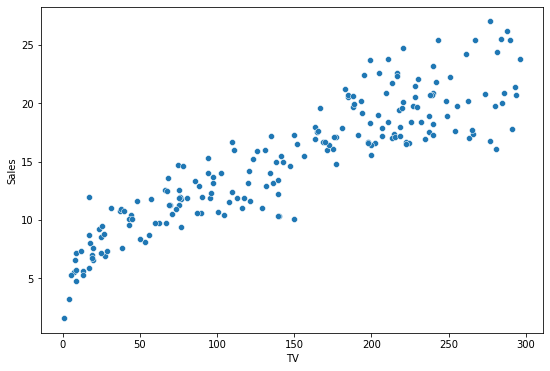

In [4]:
plt.figure(figsize=(9,6))
sns.scatterplot(data=df, x='TV', y='Sales')
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.1, random_state=42) 

In [6]:
from sklearn.linear_model import LinearRegression
LR_model = LinearRegression()

In [7]:
x_train = np.asanyarray(df[['TV']])
y_train = np.asanyarray(df[['Sales']])

In [8]:
LR_model.fit(x_train,y_train)

LinearRegression()

In [9]:
theta1 = LR_model.coef_[0][0]
print(theta1)
theta0 = LR_model.intercept_[0]
print(theta0)

0.055464770469558874
6.974821488229891


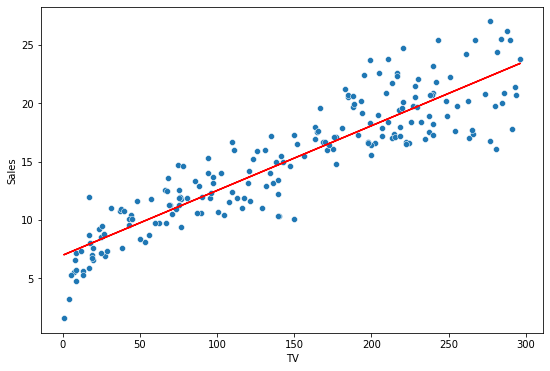

In [10]:
plt.figure(figsize=(9,6))
sns.scatterplot(data=df, x='TV', y='Sales')
plt.plot(x_train, theta0 + theta1*x_train, '-r')
plt.show()

Modelni Baholaymiz

In [11]:
x_test = np.asanyarray(test_set[['TV']])
y_test = np.asanyarray(test_set[['Sales']])

In [12]:
y_predicted = LR_model.predict(x_test)

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
MAE =mean_absolute_error(y_test, y_predicted)
RMSE = np.sqrt(mean_squared_error(y_test, y_predicted))
print(MAE)
print(RMSE)

2.0319425898146943
2.5056423555977414


In [14]:
x_test = df.sample(10, random_state=42)['TV'].to_numpy()
print(f"{x_test}")
y_test = df.sample(10, random_state=42)['Sales'].to_numpy()
print(f"{y_test}")

[163.3 195.4 292.9  11.7 220.3  75.1 216.8  50.  222.4 175.1]
[16.9 22.4 21.4  7.3 24.7 12.6 22.3  8.4 16.5 16.1]


In [15]:
y_predicted = theta0 + theta1*x_test
y_predicted

array([16.03221851, 17.81263764, 23.22045276,  7.6237593 , 19.19371042,
       11.14022575, 18.99958373,  9.74806001, 19.31018644, 16.6867028 ])

In [16]:
import pickle

filename = "LR_model.pkl"
with open(filename, "wb") as file:
 pickle.dump(LR_model,file)